In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB


In [256]:
df = pd.read_csv('german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [257]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [258]:
df.info

<bound method DataFrame.info of      Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0     67    male    2     own             NaN           little           1169   
1     22  female    2     own          little         moderate           5951   
2     49    male    1     own          little              NaN           2096   
3     45    male    2    free          little           little           7882   
4     53    male    2    free          little           little           4870   
..   ...     ...  ...     ...             ...              ...            ...   
995   31  female    1     own          little              NaN           1736   
996   40    male    3     own          little           little           3857   
997   38    male    2     own          little              NaN            804   
998   23    male    2    free          little           little           1845   
999   27    male    2     own        moderate         moderate           4576

In [259]:
df.describe

<bound method NDFrame.describe of      Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0     67    male    2     own             NaN           little           1169   
1     22  female    2     own          little         moderate           5951   
2     49    male    1     own          little              NaN           2096   
3     45    male    2    free          little           little           7882   
4     53    male    2    free          little           little           4870   
..   ...     ...  ...     ...             ...              ...            ...   
995   31  female    1     own          little              NaN           1736   
996   40    male    3     own          little           little           3857   
997   38    male    2     own          little              NaN            804   
998   23    male    2    free          little           little           1845   
999   27    male    2     own        moderate         moderate           45

In [260]:
df.isna().sum()


Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

Comments

* Saving accounts & checking accounts have some missing values.
* Total missing values are 394+183 = 577.

In [261]:
df['Saving accounts'] = df['Saving accounts'].fillna('unknown')
df['Checking account'] = df['Checking account'].fillna('unknown')
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,unknown,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,unknown,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


* NA values are now replaced with "unknown".

In [262]:
median_amount = df['Credit amount'].median()
df['Credit amount'] = np.where(df['Credit amount']<median_amount,'good','bad')
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,unknown,little,good,6,radio/TV
1,22,female,2,own,little,moderate,bad,48,radio/TV
2,49,male,1,own,little,unknown,good,12,education
3,45,male,2,free,little,little,bad,42,furniture/equipment
4,53,male,2,free,little,little,bad,24,car


C:\Users\user\AppData\Local\Temp\ipykernel_14124\1589277228.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(x='Credit amount',data=df,palette='pastel')


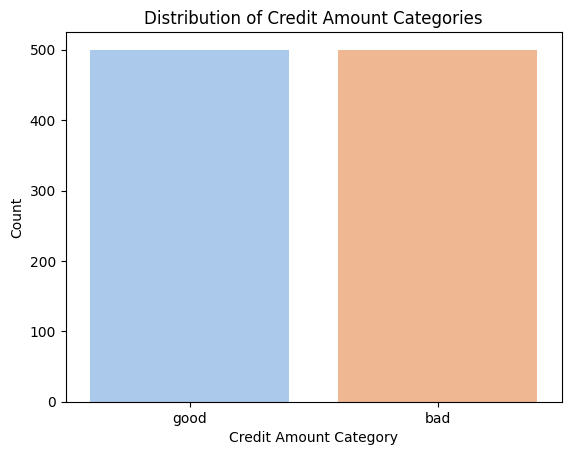

In [263]:
import seaborn as sn

sn.countplot(x='Credit amount',data=df,palette='pastel')
plt.title('Distribution of Credit Amount Categories')
plt.xlabel('Credit Amount Category')
plt.ylabel('Count')
plt.show()

Comments

* Classes are perfectly balanced, due to the median split.

C:\Users\user\AppData\Local\Temp\ipykernel_14124\2085083323.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x='Credit amount', y='Age', data=df, palette='pastel')


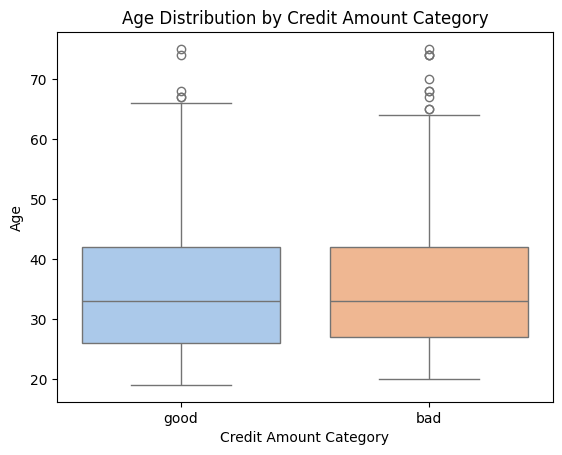

In [264]:
sn.boxplot(x='Credit amount', y='Age', data=df, palette='pastel')
plt.title('Age Distribution by Credit Amount Category')
plt.xlabel('Credit Amount Category')
plt.ylabel('Age')
plt.show()

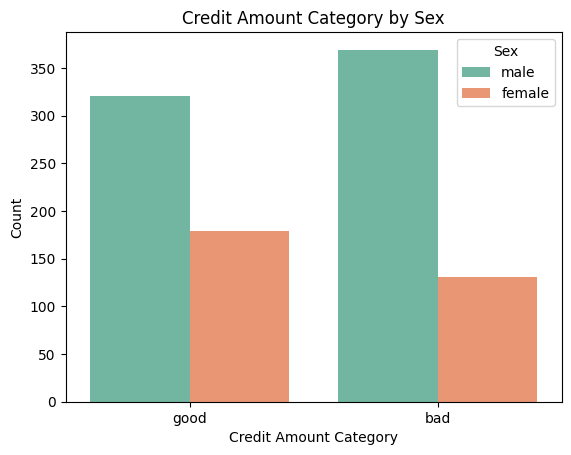

In [265]:
# Bar plot: Credit.amount categories grouped by Sex
sn.countplot(x='Credit amount', hue='Sex', data=df, palette='Set2')
plt.title('Credit Amount Category by Sex')
plt.xlabel('Credit Amount Category')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

* The bad credit class has more males than the good credit class.

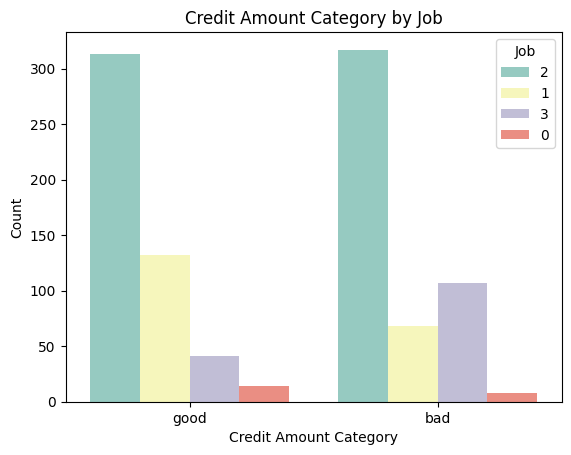

In [266]:
df['Job'] = df['Job'].astype(str)

# Bar plot: Credit.amount categories grouped by Job
sn.countplot(x='Credit amount', hue='Job', data=df, palette='Set3')
plt.title('Credit Amount Category by Job')
plt.xlabel('Credit Amount Category')
plt.ylabel('Count')
plt.legend(title='Job')
plt.show()

* The bad class has more job 3 types (highly skilled jobs).
* The good class has more job 1 types (unskilled and resident jobs).

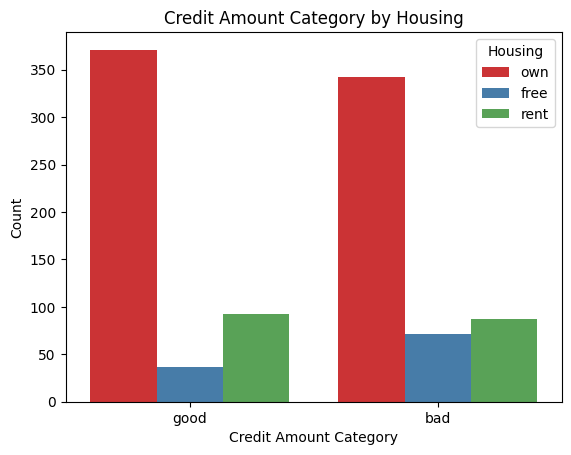

In [267]:
sn.countplot(x='Credit amount', hue='Housing', data=df, palette='Set1')
plt.title('Credit Amount Category by Housing')
plt.xlabel('Credit Amount Category')
plt.ylabel('Count')
plt.legend(title='Housing')
plt.show()

* Bad class has more free housing.
* Good class has slightly more own housing.

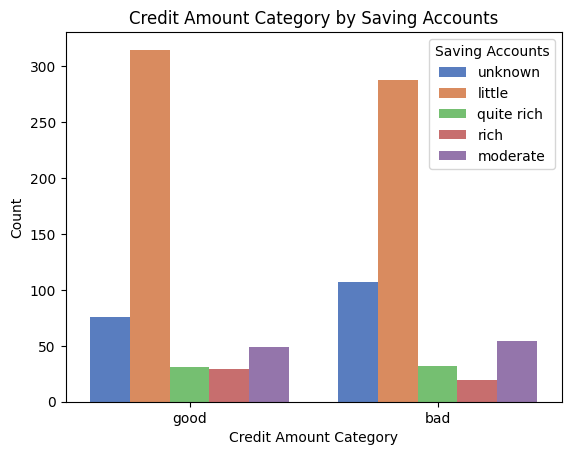

In [268]:
sn.countplot(x='Credit amount', hue='Saving accounts', data=df, palette='muted')
plt.title('Credit Amount Category by Saving Accounts')
plt.xlabel('Credit Amount Category')
plt.ylabel('Count')
plt.legend(title='Saving Accounts')
plt.show()

Comments

* Good class has more little savings.
* Bad class has more unknown values.
* Rich people tend to have a better credit score.

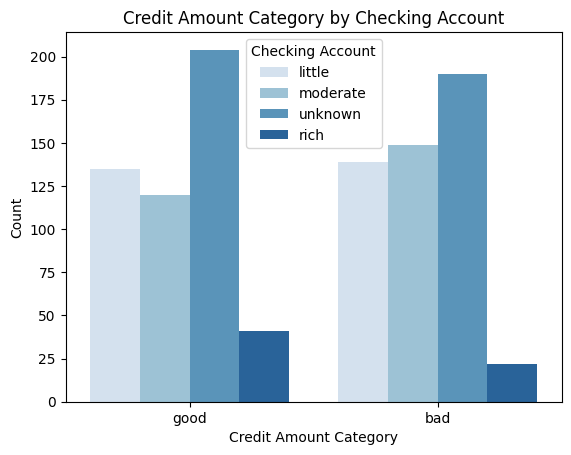

In [269]:
sn.countplot(x='Credit amount', hue='Checking account', data=df, palette='Blues')
plt.title('Credit Amount Category by Checking Account')
plt.xlabel('Credit Amount Category')
plt.ylabel('Count')
plt.legend(title='Checking Account')
plt.show()

Comments

* Rich people have a better credit score.
* Moderate checking accounts have a worse credit score.

C:\Users\user\AppData\Local\Temp\ipykernel_14124\271499424.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x='Credit amount', y='Duration', data=df, palette='coolwarm')


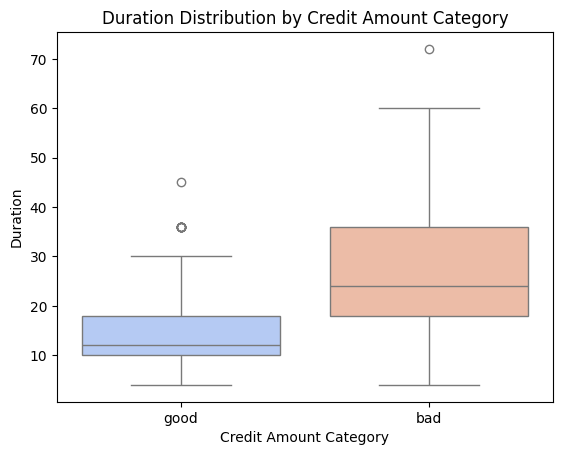

In [270]:
# Boxplot: Duration vs Credit.amount category
sn.boxplot(x='Credit amount', y='Duration', data=df, palette='coolwarm')
plt.title('Duration Distribution by Credit Amount Category')
plt.xlabel('Credit Amount Category')
plt.ylabel('Duration')
plt.show()

Comments

* Customers with a longer duration have a worse credit amount.

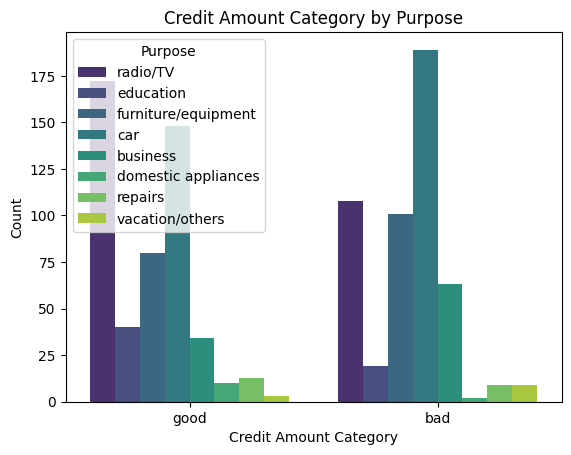

In [271]:
sn.countplot(x='Credit amount', hue='Purpose', data=df, palette='viridis')
plt.title('Credit Amount Category by Purpose')
plt.xlabel('Credit Amount Category')
plt.ylabel('Count')
plt.legend(title='Purpose')
plt.show()

Comments

* Radio/TV as a purpose has a better credit amount.
* Car as a purose has a worse credit amount.

In [272]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,unknown,little,good,6,radio/TV
1,22,female,2,own,little,moderate,bad,48,radio/TV
2,49,male,1,own,little,unknown,good,12,education
3,45,male,2,free,little,little,bad,42,furniture/equipment
4,53,male,2,free,little,little,bad,24,car


In [273]:
# # Replace specific category names for consistency in dummy variable creation
# df['Saving accounts'] = df['Saving accounts'].replace({'quite rich': 'quite_rich'})

# df['Purpose'] = df['Purpose'].replace({
#     'domestic appliances': 'domestic_appliances',
#     'furniture/equipment': 'furniture_equipment',
#     'radio/TV': 'radio_TV',
#     'vacation/others': 'vacation_others'
# })


In [274]:
df_dummies_new = pd.get_dummies(df,drop_first=True,dtype=int)
print(df_dummies_new.head())

   Age  Duration  Sex_male  Job_1  Job_2  Job_3  Housing_own  Housing_rent  \
0   67         6         1      0      1      0            1             0   
1   22        48         0      0      1      0            1             0   
2   49        12         1      1      0      0            1             0   
3   45        42         1      0      1      0            0             0   
4   53        24         1      0      1      0            0             0   

   Saving accounts_moderate  Saving accounts_quite rich  ...  \
0                         0                           0  ...   
1                         0                           0  ...   
2                         0                           0  ...   
3                         0                           0  ...   
4                         0                           0  ...   

   Checking account_rich  Checking account_unknown  Credit amount_good  \
0                      0                         0                   1  

In [275]:
print(df_dummies_new.describe)

<bound method NDFrame.describe of      Age  Duration  Sex_male  Job_1  Job_2  Job_3  Housing_own  Housing_rent  \
0     67         6         1      0      1      0            1             0   
1     22        48         0      0      1      0            1             0   
2     49        12         1      1      0      0            1             0   
3     45        42         1      0      1      0            0             0   
4     53        24         1      0      1      0            0             0   
..   ...       ...       ...    ...    ...    ...          ...           ...   
995   31        12         0      1      0      0            1             0   
996   40        30         1      0      0      1            1             0   
997   38        12         1      0      1      0            1             0   
998   23        45         1      0      1      0            0             0   
999   27        45         1      0      1      0            1             0   

     

In [276]:
x = df_dummies_new.drop('Credit amount_good', axis='columns')
y = df_dummies_new['Credit amount_good']

In [277]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [278]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [279]:
rf.score(x_test,y_test)

0.75

In [280]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.675

In [281]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

c:\Users\user\Desktop\Machine_Learning_Codes\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.74

In [282]:
from sklearn.svm import SVC

model2 = SVC()
model2.fit(x_train, y_train)
model2.score(x_test, y_test)

0.69

In [283]:
y_pred = rf.predict(x_test)


In [284]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,y_pred)

Text(58.222222222222214, 0.5, 'Actual')

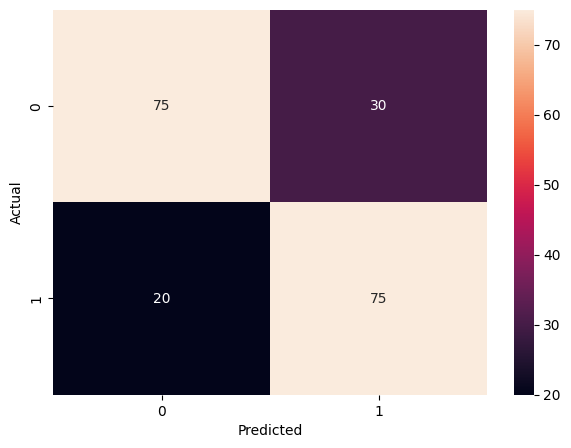

In [285]:
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cf,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [286]:
from sklearn.metrics import classification_report

# y_true = actual labels, y_pred = predicted labels
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       105
           1       0.71      0.79      0.75        95

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200



In [287]:
print('Random Forest: ', rf.score(x_test, y_test))
print('Logistic Regression: ', lr.score(x_test, y_test))
print('Support Vector Machine: ', model2.score(x_test, y_test))
print('KNN Algo: ', knn.score(x_test, y_test))


Random Forest:  0.75
Logistic Regression:  0.74
Support Vector Machine:  0.69
KNN Algo:  0.675


In [288]:
from sklearn.model_selection import GridSearchCV

model_params = {
    'svm':{
        'model':SVC(),
        'params':{
            'C':[1,10,20,50],
            'kernel':['linear','rbf']
        }
    },
    'Logistic_Regression':{
        'model':LogisticRegression(),
        'params':{
            'C':[1,5,10]
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[50,150,200]
        }
    },
    
    'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'params':{
            
        }
    },
    'GaussianNB':{
        'model':GaussianNB(),
        'params':{
            
        }
    },
    'MultinomialNB':{
        'model':MultinomialNB(),
        'params':{
            
        }
    }
    
}

In [289]:
scores = []

for model_name, mp in model_params.items():
    cls = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    cls.fit(x,y)
    
    scores.append({
        'model':model_name,
        'best_par': cls.best_params_,
        'best_score': cls.best_score_
    })
    

c:\Users\user\Desktop\Machine_Learning_Codes\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\Desktop\Machine_Learning_Codes\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

In [290]:
pd.DataFrame(scores)

,model,best_par,best_score
0,svm,"{'C': 1, 'kernel': 'linear'}",0.762
1,Logistic_Regression,{'C': 10},0.760
2,random_forest,{'n_estimators': 150},0.730
3,KNeighborsClassifier,{},0.696
4,GaussianNB,{},0.669
5,MultinomialNB,{},0.720
